In [1]:
from example import spark

:: loading settings :: url = jar:file:/Users/da/.pyenv/versions/3.8.10/envs/rikai-example/lib/python3.8/site-packages/pyspark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/da/.ivy2/cache
The jars for the packages stored in: /Users/da/.ivy2/jars
ai.eto#rikai_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-39e1a35c-121e-4ebd-b21c-4578a68d550a;1.0
	confs: [default]
	found ai.eto#rikai_2.12;0.0.12 in central
	found org.antlr#antlr4-runtime;4.8-1 in local-m2-cache
	found org.xerial.snappy#snappy-java;1.1.8.4 in central
	found org.apache.logging.log4j#log4j-api-scala_2.12;12.0 in central
	found org.scala-lang#scala-reflect;2.12.10 in spark-list
	found org.apache.logging.log4j#log4j-api;2.13.2 in central
	found io.circe#circe-core_2.12;0.12.3 in central
	found io.circe#circe-numbers_2.12;0.12.3 in central
	found org.typelevel#cats-core_2.12;2.0.0 in central
	found org.typelevel#cats-macros_2.12;2.0.0 in central
	found org.typelevel#cats-kernel_2.12;2.0.0 in central
	found io.circe#circe-generic_2.12;0.12.3 in central
	found com.chuusai#shapeless_2.12;2.3.3 in spark-list
	found org.typ

In [1]:
import mlflow
mlflow.set_tracking_uri("sqlite:///mlruns.db")
model = mlflow.pytorch.load_model("runs:/b9b29ead98d84d8192a6f6e83d386c0d/model")

In [2]:
from transform.yolov5 import pre_processing
from transform.yolov5 import post_processing
pre_f = pre_processing({})
post_f = post_processing({})

In [4]:
rows = spark.sql("""
select frame_id, date_format(ts, 'mm:ss') as progress, image_data
from parquet.`/tmp/rikai_example/elephants_dream`
where frame_id > 1000 and frame_id < 1500
order by frame_id asc
limit 10
""").collect()

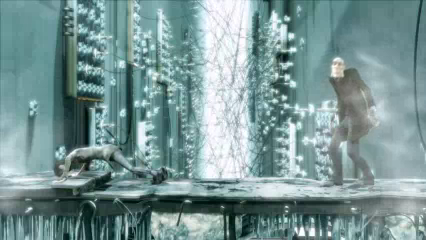

In [5]:
from rikai.types.vision import Image
Image(rows[0].image_data)

In [3]:
input = pre_f("img/lena.png") # pre_f(rows[0].image_data)

start _pre_process_func

end with torch.Size([1, 3, 640, 640])



In [7]:
input.shape

torch.Size([1, 3, 384, 640])

In [8]:
pred = model(input)

In [6]:
pred[0]

tensor([[[4.89905e+00, 4.20724e+00, 9.33497e+00,  ..., 2.73394e-03, 9.59848e-04, 5.01352e-03],
         [9.99153e+00, 4.06950e+00, 1.89565e+01,  ..., 2.99188e-03, 1.01949e-03, 4.64734e-03],
         [1.84248e+01, 3.96202e+00, 2.73070e+01,  ..., 2.64174e-03, 9.32375e-04, 4.97093e-03],
         ...,
         [5.61433e+02, 5.99949e+02, 1.53033e+02,  ..., 1.13241e-02, 1.38347e-03, 2.84257e-03],
         [5.87604e+02, 6.01580e+02, 1.12391e+02,  ..., 9.29507e-03, 2.04680e-03, 4.47145e-03],
         [6.23095e+02, 6.14236e+02, 1.14326e+02,  ..., 1.49270e-02, 2.24324e-03, 5.91340e-03]]])

In [9]:
post_f(pred)

[{'boxes': [array([488,  97, 571, 294]), array([112, 307, 230, 371])],
  'label_ids': [0, 0],
  'scores': [0.81, 0.41]}]

In [10]:
from rikai.torch.pandas import PandasDataset

In [11]:
dataset = PandasDataset(input, transform=pre_processing)

AssertionError: 

In [16]:
import pandas as pd
data = pd.Series([input])
data.iloc[0].shape

torch.Size([1, 3, 384, 640])